
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

Classification.  
This is a classification problem because given the information for each student, we want the machine to identify which students are going to fail or pass the final exam. Since the output is represented by "passed", which is a discrete variable that can only take values "yes" or "no", it is a classification problem, precisely, a binary classification problem.

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read student data
data = pd.read_csv('student-data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# Calculate number of students
n_students = len(data.index)

In [4]:
# Calculate number of features
n_features = len(data.columns)-1

In [5]:
# Calculate passing students
n_passed = len(data[data['passed']=="yes"])

In [6]:
# Calculate failing students
n_failed = len(data[data['passed']=="no"])

In [7]:
# Calculate graduation rate
grad_rate = (n_passed/n_students)*100

In [8]:
# Print the results
print('The total number of students:',n_students)
print('The total number of features for each student:',n_features)
print('The number of those students who passed:',n_passed)
print('The number of those students who failed:',n_failed)
print('The graduation rate of the class: {:.2f}%'.format(grad_rate))

The total number of students: 395
The total number of features for each student: 30
The number of those students who passed: 265
The number of those students who failed: 130
The graduation rate of the class: 67.09%


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [9]:
# Extract feature columns
feature_columns = data.columns[:-1]

In [10]:
# Show the list of columns
print("Feature columns:\n{}".format(feature_columns))

Feature columns:
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')


In [11]:
# Extract target column 'passed'
target_column = data.columns[-1]

In [12]:
#show the target column
print("\nTarget column: {}".format(target_column))


Target column: passed


In [13]:
# Separate the data into feature data and target data (X and y, respectively)

In [14]:
X = data[feature_columns]
y = data[target_column]

#displaying first five rows in feature data X
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [15]:
#converting non-numeric binary variables into binary (0/1) variables.
X = X.replace({'yes':1,'no':0})

In [16]:
#converting categorical variables into dummy variables using one-hot encoding
X = pd.get_dummies(data=X, columns= ['school','sex','address','famsize','Pstatus','Mjob', 'Fjob','reason','guardian'])
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [17]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size =95,train_size=300)

In [18]:
# Show the results of the split
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 48)
(300,)
(95, 48)
(95,)


### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

Popular algorithms that can be used for binary classification include:
* Logistic Regression.
* k-Nearest Neighbors.
* Decision Trees.
* Support Vector Machine.
* Naive Bayes

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

We are going to use **Radial SVM**, **Logistic Regression**, and **KNN** to solve the given problem.

#### Support Vector Machine  
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.
The goal of the SVM algorithm is to create the best line or decision boundary(known as hyperplane) that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.  
**Application**: Face detection, Image classification, Handwriting recognition, Classification of genes, Protein remote homology detection.  
**Strengths**: It is effective in high dimensional spaces. It is memory efficient. It can classify non-linearly separable classes. Risk of overfitting is less in SVM.  
**Weaknesses**: SVM algorithm is not suitable for large data sets as it takes time. SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.  
**Reason for choosing**: SVMs perform well at classification problems. The amount of dimensions of the data (48) is much smaller than the amount of samples in the input (395). They can classify non-linearly separable data, which might be the case.

#### Logistic Regression  
Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1. Logistic regression is used for solving the classification problems.  
**Application**: In NLP it is used to determine the sentiment of movie reviews, while in Medicine it can be used to determine the probability of a patient developing a particular disease.  
**Strengths**: Logistic regression is easier to implement, interpret, and very efficient to train. It is very fast at classifying unknown records.  
**Weaknesses**: It can only be used to predict discrete functions. Hence, the dependent variable of Logistic Regression is bound to the discrete number set. If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.  
**Reason for choosing**: As it is easy to implement and resultant accuracy score was high, we used it.

#### KNN  
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. It can be used for Regression as well as for Classification but mostly it is used for the Classification problems.  
**Application**: Computer vision, Recommenting systems.  
**Strengths**: It reduces variance and avoids overfitting. KNN could be successful in classification problems where the decision boundary is irregular.  
**Weaknesses**: KNN stores instances of the training data and computes nearest neighbors of each point so running time is very slow compared to other models when predicting. A linear combination of KNN classification can be harder to interpret than one KNN classification. KNN is a lazy learner. It will be slow during prediction when there are too many data points. KNN will not know which attributes are more important than others because all attributes have same weight.  
**Reason for choosing**: Since K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data,the decision boundary will be flexible. so, we thought it will perform well for this dataset.

In [19]:
# Import the three supervised learning models from sklearn
from sklearn.svm import SVC # for Support Vector Machine (SVM) Classifier Algorithm
from sklearn.linear_model import LogisticRegression #for implementing Logistic regression
from sklearn.neighbors import KNeighborsClassifier #for implementing KNN

from sklearn import metrics #for measuring the performance of the model

In [20]:
# fit model-1  on traning data 

In [21]:
#radial SVM
model = SVC(kernel = 'rbf') 
model.fit(X_train,y_train)

SVC()

In [22]:
# predict on the test data 

In [23]:
prediction = model.predict(X_test)

In [24]:
# calculate the accuracy score

In [25]:
print('The accuracy of the SVM is:','%.2f'%(metrics.accuracy_score(y_test, prediction)*100),'%')

The accuracy of the SVM is: 63.16 %


In [26]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

In [27]:
#logistic regression
logit_model = LogisticRegression(max_iter=375)
logit_model.fit(X_train,y_train)

#predicting on the test data
prediction = logit_model.predict(X_test)

#measuring the performance
print('The accuracy of the logistic regression is:','%.2f'%(metrics.accuracy_score(y_test, prediction)*100),'%')

The accuracy of the logistic regression is: 69.47 %


In [28]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

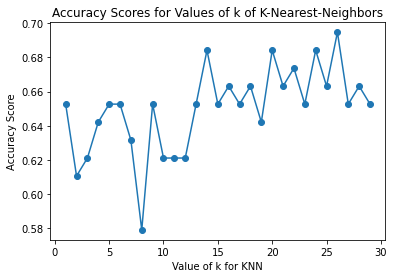

In [29]:
k_range = list(range(1,30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores,marker="o")
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of K-Nearest-Neighbors')
plt.show()

In [30]:
model = KNeighborsClassifier(n_neighbors=26) 
model.fit(X_train,y_train)
prediction = model.predict(X_test)

print('The accuracy of the KNN is','%.2f'%(metrics.accuracy_score(y_test, prediction)*100),'%')

The accuracy of the KNN is 69.47 %
